# Final Project
## Authors:
- Taylor Tucker
- Virginia Weston
- Tina Jin
- Jeffrey Bradley

## Code for linear regression modeling

Import Statements

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier, ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

Importing the continuous dataset

In [18]:
df = pd.read_csv("./cleaned_data.csv", index_col=0)

In [19]:
df

,Number of Bachelor's Degrees,Percent Financial Aid,Average Amount of Aid,Retention Rate,Enrollment,Percent Women,Percent In State,Percent Out of State,Percent Foreign,Percent Unknown,Graduation Rate,Percent Awarded,Total Staff,Instructional Staff,SA Staff,Librarian Staff,Percent Books,Percent Digital,Percent Admitted,Total Price
0,208.0,100.0,32400.0,79.0,996,99.0,59.0,36.0,4.0,0.0,69.0,66.0,357.0,105.0,56.0,62.0,41,12,70.0,55625.0
1,310.0,100.0,40855.0,75.0,1533,54.0,66.0,32.0,1.0,0.0,64.0,61.0,435.0,132.0,21.0,27.0,37,54,68.0,59470.0
2,398.0,100.0,39796.0,68.0,1912,60.0,53.0,46.0,1.0,0.0,51.0,48.0,355.0,123.0,17.0,21.0,28,13,62.0,60636.0
3,382.0,100.0,38689.0,82.0,1771,56.0,50.0,45.0,4.0,0.0,74.0,70.0,426.0,160.0,41.0,50.0,27,46,64.0,63180.0
4,61.0,97.0,10055.0,37.0,698,45.0,64.0,34.0,0.0,2.0,31.0,10.0,115.0,41.0,4.0,7.0,20,76,64.0,23170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,71.0,100.0,9682.0,52.0,479,43.0,67.0,28.0,6.0,0.0,38.0,30.0,117.0,33.0,8.0,11.0,39,61,56.0,29630.0
234,511.0,63.0,55897.0,99.0,2095,48.0,12.0,78.0,9.0,0.0,95.0,86.0,1133.0,342.0,44.0,83.0,28,56,13.0,73200.0
235,363.0,100.0,29504.0,70.0,1757,55.0,79.0,21.0,1.0,0.0,62.0,61.0,373.0,142.0,13.0,17.0,49,22,74.0,53056.0
236,379.0,98.0,31824.0,88.0,1666,53.0,55.0,42.0,3.0,0.0,81.0,77.0,440.0,152.0,23.0,34.0,14,60,64.0,60363.0


Splitting the data into x and y

In [20]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
x

,Number of Bachelor's Degrees,Percent Financial Aid,Average Amount of Aid,Retention Rate,Enrollment,Percent Women,Percent In State,Percent Out of State,Percent Foreign,Percent Unknown,Graduation Rate,Percent Awarded,Total Staff,Instructional Staff,SA Staff,Librarian Staff,Percent Books,Percent Digital,Percent Admitted
0,208.0,100.0,32400.0,79.0,996,99.0,59.0,36.0,4.0,0.0,69.0,66.0,357.0,105.0,56.0,62.0,41,12,70.0
1,310.0,100.0,40855.0,75.0,1533,54.0,66.0,32.0,1.0,0.0,64.0,61.0,435.0,132.0,21.0,27.0,37,54,68.0
2,398.0,100.0,39796.0,68.0,1912,60.0,53.0,46.0,1.0,0.0,51.0,48.0,355.0,123.0,17.0,21.0,28,13,62.0
3,382.0,100.0,38689.0,82.0,1771,56.0,50.0,45.0,4.0,0.0,74.0,70.0,426.0,160.0,41.0,50.0,27,46,64.0
4,61.0,97.0,10055.0,37.0,698,45.0,64.0,34.0,0.0,2.0,31.0,10.0,115.0,41.0,4.0,7.0,20,76,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,71.0,100.0,9682.0,52.0,479,43.0,67.0,28.0,6.0,0.0,38.0,30.0,117.0,33.0,8.0,11.0,39,61,56.0
234,511.0,63.0,55897.0,99.0,2095,48.0,12.0,78.0,9.0,0.0,95.0,86.0,1133.0,342.0,44.0,83.0,28,56,13.0
235,363.0,100.0,29504.0,70.0,1757,55.0,79.0,21.0,1.0,0.0,62.0,61.0,373.0,142.0,13.0,17.0,49,22,74.0
236,379.0,98.0,31824.0,88.0,1666,53.0,55.0,42.0,3.0,0.0,81.0,77.0,440.0,152.0,23.0,34.0,14,60,64.0


In [22]:
y

0      55625.0
1      59470.0
2      60636.0
3      63180.0
4      23170.0
        ...   
233    29630.0
234    73200.0
235    53056.0
236    60363.0
237    43389.0
Name: Total Price, Length: 225, dtype: float64

Train test split 70-30

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, shuffle=True, test_size=0.3)

Creating the linear regression pipeline with L2 regularization and Stochastic Gradient Descent. Note that the SGDRegressor API call with OLS loss function is the same as linear regression with SGD.

In [24]:
pl = make_pipeline(StandardScaler(), MinMaxScaler(), SGDRegressor(loss='squared_loss', penalty='l2', max_iter=2000))

Fitting the pipeline to the training data

In [25]:
pl.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('sgdregressor', SGDRegressor(max_iter=2000))])

Scoring the pipeline, which will show the R^2 value from the Linear Regression model

In [26]:
print("Model Score (whole dataset):", pl.score(x_test, y_test))

Model Score (whole dataset): 0.8239830830352639


We can see above that using the whole dataset for a simple linear regression using L2 regularization and the two scalers mentioned in the README, we can
achieve an R^2 of around 83%. However, I want to use only the most 1 or 2 linearly correlated features we can see from
the correlation heatmap in the figs directory. These features are ["Average Amount of Aid", "Graduation Rate"]


Redefining x using only features ["Average Amount of Aid", "Graduation Rate"]

In [27]:
x = df[["Average Amount of Aid", "Graduation Rate"]]
x

,Average Amount of Aid,Graduation Rate
0,32400.0,69.0
1,40855.0,64.0
2,39796.0,51.0
3,38689.0,74.0
4,10055.0,31.0
...,...,...
233,9682.0,38.0
234,55897.0,95.0
235,29504.0,62.0
236,31824.0,81.0


Same exact process as before, with the same pipeline

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, shuffle=True, test_size=0.3)

Fitting the pipeline to the training data

In [29]:
pl.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('sgdregressor', SGDRegressor(max_iter=2000))])

Scoring the pipeline, which will show the R^2 value from the Linear Regression model

In [30]:
print("Model Score (partial dataset):", pl.score(x_test, y_test))

Model Score (partial dataset): 0.8483417603566467


There is no real R^2 score difference between the two models. However, this accuracy is much better than the accuracy on any of our other models. We think that using only those two features with L2 regularization would help us get the best model for the masses because
it would decrease the generalization error that could come from using all of the features. Also, if using 2 features can achieve nearly the same effect as using 20, we would stick to "Average Amount of Aid" and "Graduation Rate" to save computation time.

Below is a plot of the ["Average Amount of Aid", "Graduation Rate"] feature pair and the target variable. We could see a clear linear relationship.

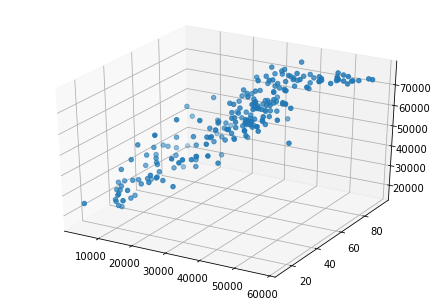

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs=df["Average Amount of Aid"], ys=df["Graduation Rate"], zs=df["Total Price"])
plt.savefig("./figs/linear_regression_visualization.png")
plt.show()

In [32]:
cvscore = cross_val_score(estimator=pl, X=x_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % cvscore)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cvscore), np.std(cvscore)))

CV accuracy scores: [0.83441626 0.84658127 0.84464298 0.78663178 0.72020887 0.83831008
 0.77008909 0.6390311  0.83255592 0.86833983]
CV accuracy: 0.798 +/- 0.068


After examining the linear regression, we also tried linear models Ridge, Lasso, and ElasticNet. See notebook 'other_linear_regression'.